<a href="https://colab.research.google.com/github/chris-hendrix/lumped-mass-stick-modeler/blob/main/toy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tuned-Mass Damper Toy

## Setup

In [30]:
# get latest lumped mass stick modeler package
!rm lumped_mass_stick_modeler.py
!wget https://raw.githubusercontent.com/chris-hendrix/lumped-mass-stick-modeler/main/lumped_mass_stick_modeler.py


--2021-05-08 16:31:07--  https://raw.githubusercontent.com/chris-hendrix/lumped-mass-stick-modeler/main/lumped_mass_stick_modeler.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7236 (7.1K) [text/plain]
Saving to: ‘lumped_mass_stick_modeler.py’

lumped_mass_stick_m 100%[===================>]   7.07K  --.-KB/s    in 0s      

2021-05-08 16:31:07 (78.4 MB/s) - ‘lumped_mass_stick_modeler.py’ saved [7236/7236]



### Import packages

In [32]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from lumped_mass_stick_modeler import LumpedMassStickModel
from matplotlib import rc
rc('animation', html='jshtml')


## Define loading paramaters

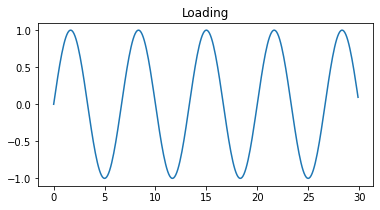

In [33]:
# time paramaters
tmax = 30
dt = 0.1
steps = int(tmax/dt)
t = np.arange(steps) * dt

# load paramaters
fp = 0.15
psin = 1*np.sin(2*math.pi*fp*t)
pzero = 0*t

# excite the first mass
p_mat = [psin]
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.set_title('Loading')
plt.plot(t, psin)
plt.show()

## Control model

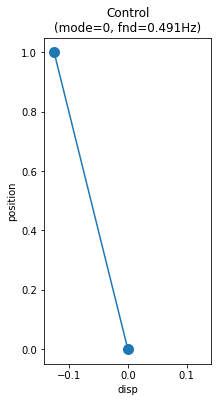

In [34]:
# model input
m = 1
k = 10
xi = 0.05
wn = math.sqrt(k/m)
c = 2*xi*wn*m

# define model
ctrl = LumpedMassStickModel([m], [k], [c], [psin], dt, name='Control')

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(3,6))
ani = ctrl.get_animation(fig=fig,ax=axs,mode=0)
ani

## Tuned mass damper

In [27]:
md = 0.05*m
mbar = md/m
fopt = math.sqrt(1-.5*mbar)/(1+mbar)
xidopt = math.sqrt(
    mbar*(3-math.sqrt(.5*mbar))/
    (8*(1+mbar)*(1-.05*mbar))
)
kd = mbar*fopt**2*k
wnd = math.sqrt(kd/md)
cd = 2*xidopt*wnd*md

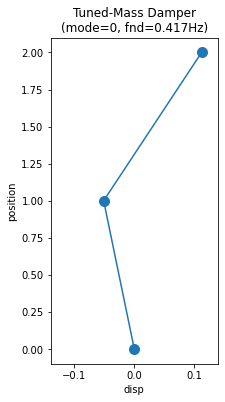

In [29]:
tmd = LumpedMassStickModel([m, md], [k, kd], [c, cd], [psin, pzero], dt, name="Tuned-Mass Damper")

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(3,6))
ani = tmd.get_animation(mode=0,fig=fig,ax=axs)
ani

## Comparison

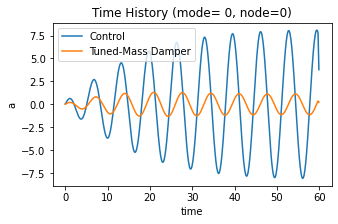

In [10]:
fig, ax = plt.subplots(figsize=(5,3))
ctrl.get_time_history_plt(ax)
tmd.get_time_history_plt(ax)
plt.legend()
plt.show()